In [87]:
import numpy as np

import networkx as nx

num_nodes = 4

w = np.array(
    [[0.0, 1.0, 1.0, 0.0], [1.0, 0.0, 1.0, 1.0], [1.0, 1.0, 0.0, 1.0], [0.0, 1.0, 1.0, 0.0]]
)
G=nx.from_numpy_array(w)

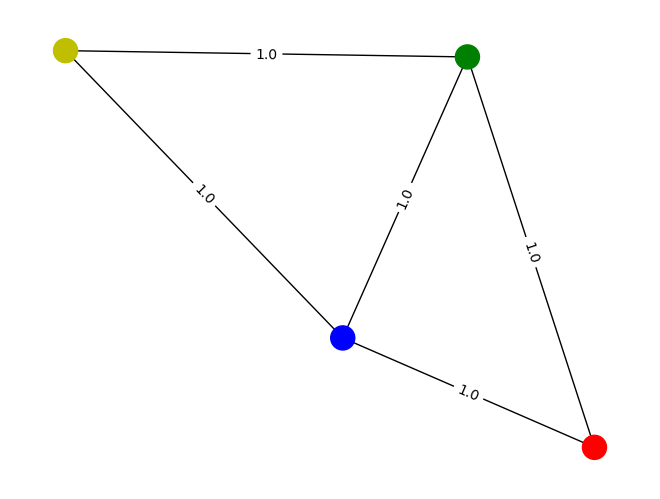

In [88]:
layout = nx.random_layout(G,seed=10)
colors=["r","g","b","y"]
nx.draw(G,layout,node_color=colors)
labels=nx.get_edge_attributes(G,"weight")
nx.draw_networkx_edge_labels(G,pos=layout,edge_labels=labels);

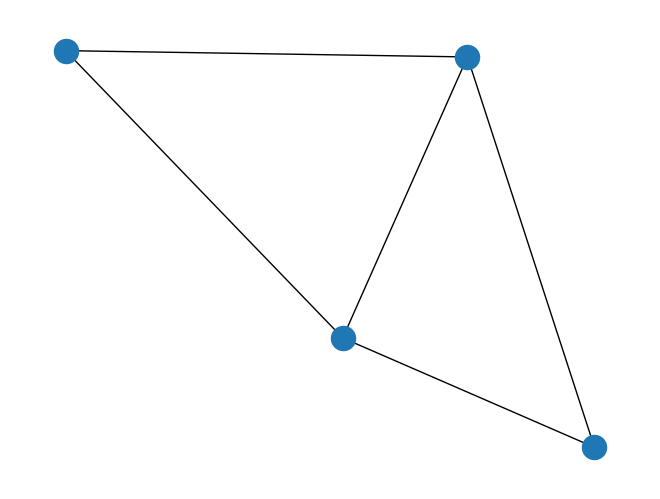

In [89]:
layout = nx.random_layout(G,seed=10)
colors=["r","g","b","y"]
nx.draw(G,layout,node_color=None)

Brute-force method (trying all the bitstring combinations)

In [90]:
def objective_value(x,w):
  X=np.outer(x,(1-x))
  w_01= np.where(w!=0,1,0)
  return np.sum(w_01*X)

def bitfield(n,L):
  result = np.binary_repr(n,L)
  return [int(digit) for digit in result]

L=num_nodes
max=2**L
sol=np.inf

for i in range(max):
  cur=bitfield(i,L)

  how_many_nonzero=np.count_nonzero(cur)
  if how_many_nonzero*2 != L:
    continue

  cur_v=objective_value(np.array(cur),w)
  if cur_v<sol:
    sol=cur_v

print(f"Objective value computed by the brute-force method is {sol}")

Objective value computed by the brute-force method is 3


In [91]:
#Testing the algorithm to understand. Purpose: Fidnign the cut's total weight value.

w_01=np.where(w!=0,1,0) # np.where(condition,return if True, return if False)

x=np.array([0,1,0,1]) #random array
X=np.outer(x,(1-x)) #np.outer(column,row). Output= colomn matrix * row matrix

print(w_01)
print(X)
print(w_01*X) # w_01 [a,b] and X [i,j] instances are multiplied where a=i, b=j. Use here: Finding the cut's total weight value. Only the weight entries survive whose corresponding X entries are 1.
np.sum(w_01*X) #sum of all the entries of w_01*X

[[0 1 1 0]
 [1 0 1 1]
 [1 1 0 1]
 [0 1 1 0]]
[[0 0 0 0]
 [1 0 1 0]
 [0 0 0 0]
 [1 0 1 0]]
[[0 0 0 0]
 [1 0 1 0]
 [0 0 0 0]
 [0 0 1 0]]


3

In [92]:
#Testing how binary_repr(n,width) works. Gives bitstring as list where n is the bitstring value in decimal and width is the max number of bits. width is optional.
#In case width is mentioned, n can be from 0 to 2**width - 1
  
L=4
n=1
result=np.binary_repr(n,L)
output= [int(digit) for digit in result]

print(output)

[0, 0, 0, 1]
